In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv(r"C:\Users\User\Downloads\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Heat Map

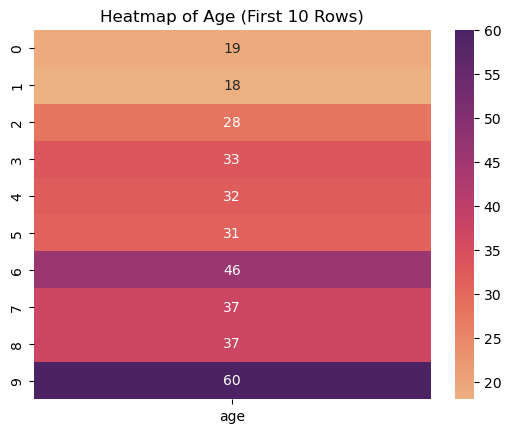

In [32]:
data = df.head(10)[["age"]]  # Get just the 'age' column from the first 10 rows
sns.heatmap(data, annot=True, cmap="flare")
# annot Shows the actual values on the heatmap cells
# Sets the color palette (colormap) for the heatmap
# vmin: Sets the minimum value for the colormap
# vmax: Sets the maximum value for the colormap.
plt.title("Heatmap of Age (First 10 Rows)")
plt.show()

In [38]:
var = np.linspace(25,10,10).reshape(2,5)
var

array([[25.        , 23.33333333, 21.66666667, 20.        , 18.33333333],
       [16.66666667, 15.        , 13.33333333, 11.66666667, 10.        ]])

<Axes: >

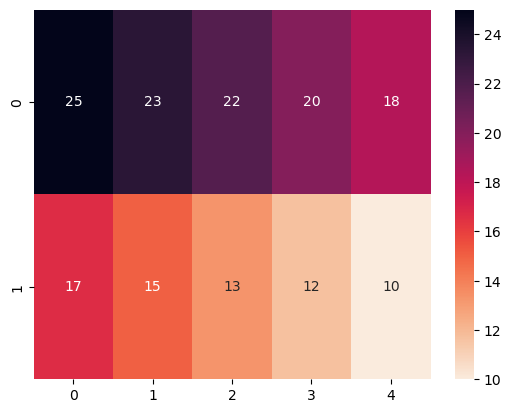

In [42]:
sns.heatmap(var, annot=True, cmap="rocket_r")

In [44]:
ar = np.array([['a','b','c','d','e'],['f','g','h','i','j']])
ar

array([['a', 'b', 'c', 'd', 'e'],
       ['f', 'g', 'h', 'i', 'j']], dtype='<U1')

<Axes: >

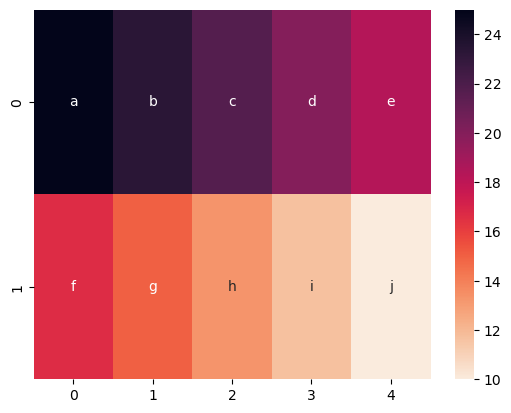

In [50]:
sns.heatmap(var,annot=ar,fmt="s", cmap="rocket_r")
# The fmt parameter sets the format of the annotations inside the heatmap cells when you use annot=True or annot=your_array

# Co-Relation of HeatMap

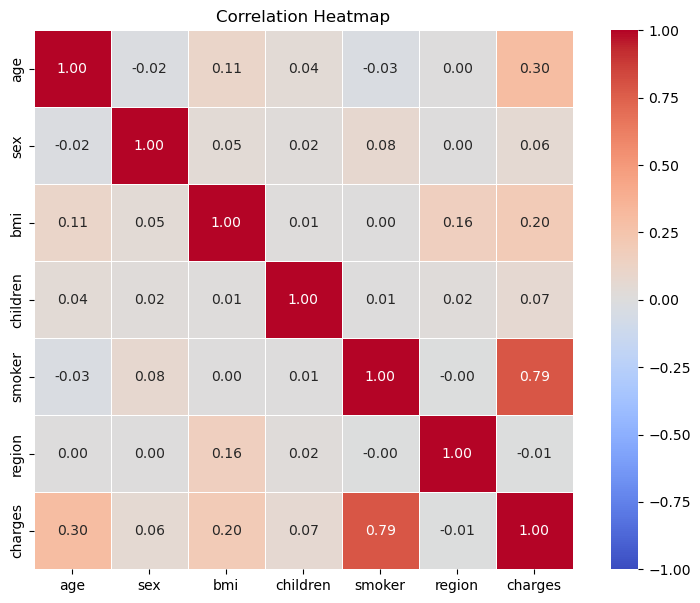

In [53]:
# Encode categorical columns if needed (optional)
df_encoded = df.copy()
df_encoded['sex'] = np.where(df['sex'] == 'male', 1, 0)
# np.where(condition, value_if_true, value_if_false)
# This turns 'male' into 1 and everything else (i.e., 'female') into 0
# Why? Because machine learning models work with numbers, not text
df_encoded['smoker'] = np.where(df['smoker'] == 'yes', 1, 0)
df_encoded['region'] = df['region'].astype('category').cat.codes
# astype('category') converts the text labels (e.g., 'southeast') to a categorical data type
# cat.codes then gives each category a unique integer (like: southeast=2, northwest=1, etc.)
# This is label encoding — transforms strings into numbers for modeling and correlation heatmap


# Calculate correlation matrix (using numpy-backed pandas)
corr = df_encoded.corr()

# plot
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr,
    annot=True,        # Show correlation values on the heatmap
    fmt=".2f",         # Format numbers to 2 decimal places
    cmap="coolwarm",   # Red-blue color scheme (cool = negative, warm = positive)
    vmin=-1, vmax=1,   # Lock scale between -1 and 1 (perfect correlation range)
    linewidths=0.5,    # Adds spacing between cells
    square=True        # Makes each cell a perfect square
)
plt.title("Correlation Heatmap")
plt.show()


''' Pearson's Co-relation
+1 → Perfect positive correlation (they rise together)

-1 → Perfect negative correlation (one goes up, the other down)

0 → No correlation at all'''

# CountPlot

In [56]:
df = pd.read_csv(r"C:\Users\User\Downloads\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


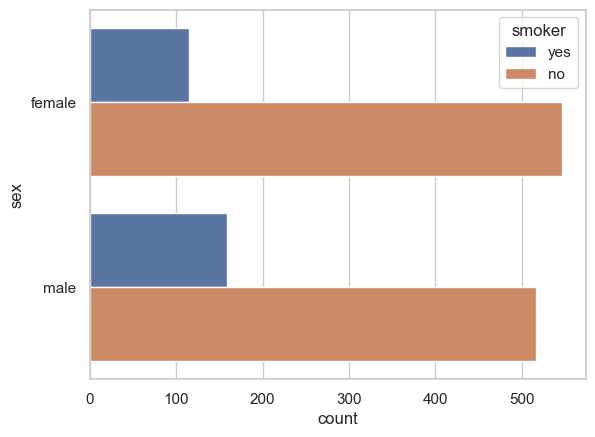

In [125]:
sns.set(style="whitegrid")
sns.countplot(y="sex",hue="smoker",data=df)
plt.show()

# Violin Plot

In [97]:
df = pd.read_csv(r"C:\Users\User\Downloads\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


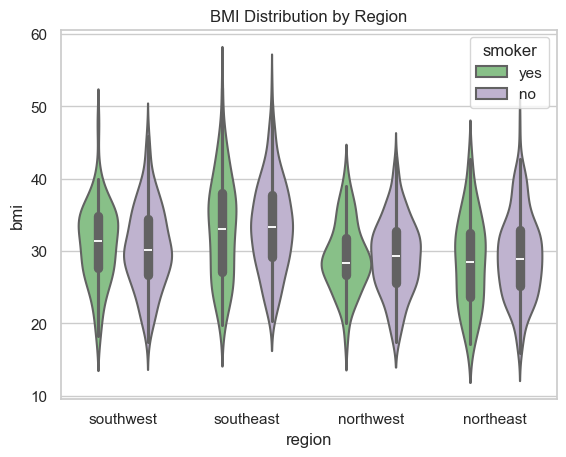

In [115]:
sns.set(style="whitegrid")
sns.violinplot(x="region",y="bmi",hue="smoker",linewidth=1.5,palette='Accent',data=df)
plt.title("BMI Distribution by Region")
plt.show()

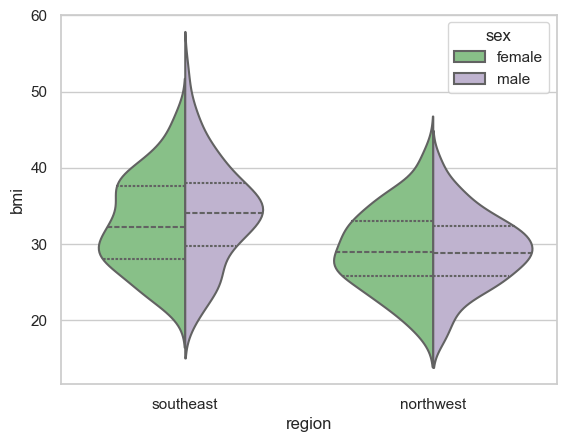

In [133]:
sns.set(style="whitegrid")
sns.violinplot(x="region", y="bmi", hue="sex", linewidth=1.5, palette='Accent', data=df, order=["southeast", "northwest"], split=True, inner="quart")
# The 'order' parameter specifies the custom order of categories ('southeast' and 'northwest') on the x-axis.
# The 'split' parameter divides the violins in half based on the 'hue' (e.g., gender), allowing comparison within each category.
# The 'inner' parameter with "quart"(also "box"/"quartile"/"Point"/"stick"/None can be used for diff purposes) displays the quartiles inside the violin plot for better insight into the distribution.
plt.show()


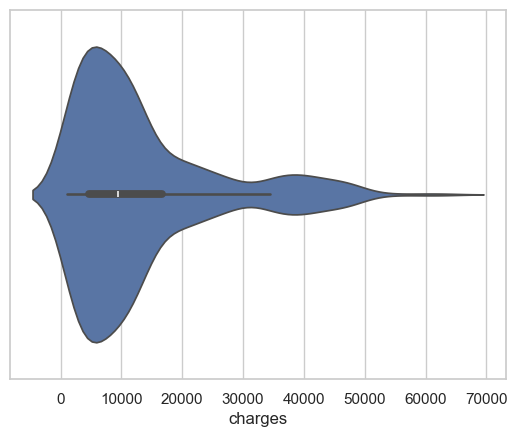

In [141]:
# To make a single violin plot:
sns.violinplot(x="charges",data=df)
plt.show()

# Pair plot

In [144]:
df = pd.read_csv(r"C:\Users\User\Downloads\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


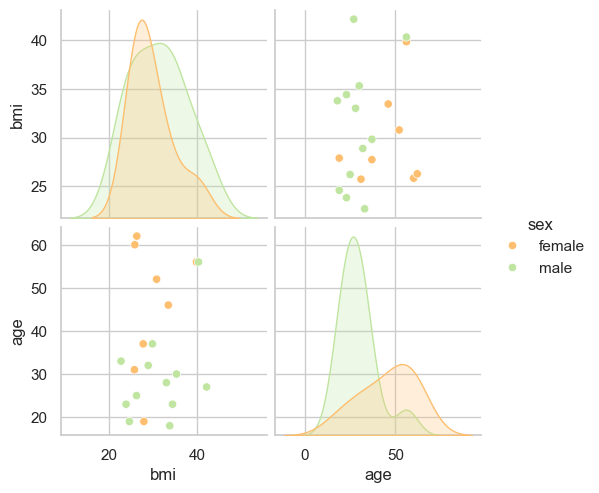

In [156]:
sns.pairplot(df.head(20),vars=["bmi","age"],hue="sex",palette="Spectral")
# The 'vars' parameter selects the specific columns to plot pairwise relationships between.
plt.show()

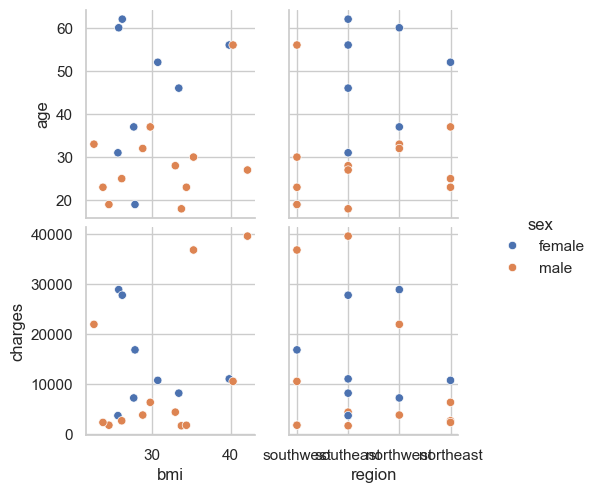

In [160]:
sns.pairplot(df.head(20), x_vars=["bmi", "region"], y_vars=["age", "charges"], hue="sex")
# 'x_vars' and 'y_vars' specify which variables to plot on the x-axis and y-axis respectively for pairwise comparisons.
plt.show()


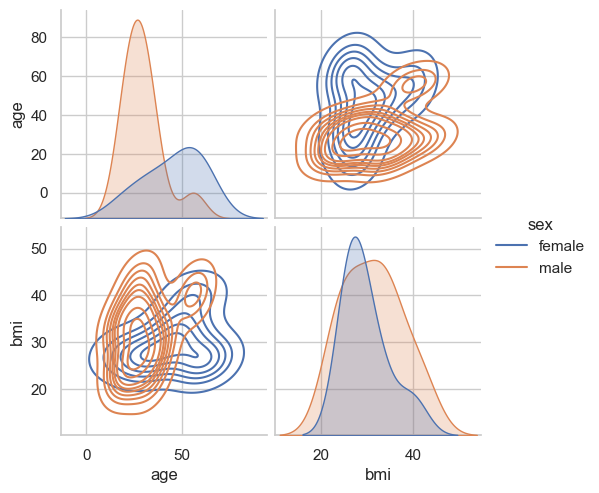

In [164]:
sns.pairplot(df.head(20), vars=["age", "bmi"], hue="sex", kind="kde")
# The 'kind' parameter sets the type of plot: 'scatter' for points (default), 'reg' for regression lines. kde and hist also
plt.show()


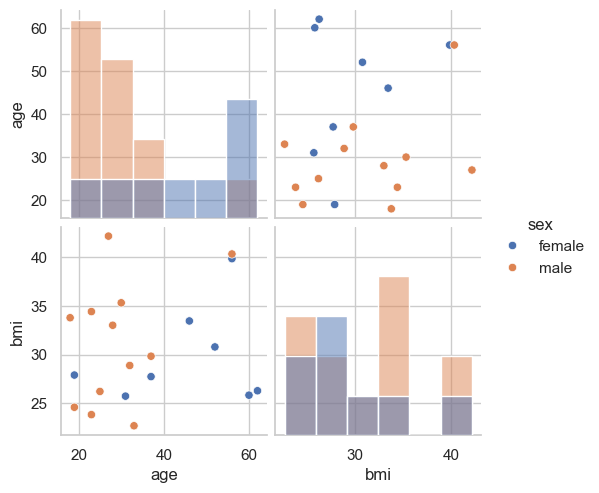

In [168]:
sns.pairplot(df.head(20), vars=["age", "bmi"], hue="sex", diag_kind="hist")
# The 'diag_kind' parameter sets the plot type on the diagonal: 'hist' for histograms, 'kde' for smooth density curves.
plt.show()

# Strip Plot

In [171]:
df = pd.read_csv(r"C:\Users\User\Downloads\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


sns.stripplot(x="region", y="bmi", data=df, jitter=True,hue="sex",palette="rocket_r")
plt.show()

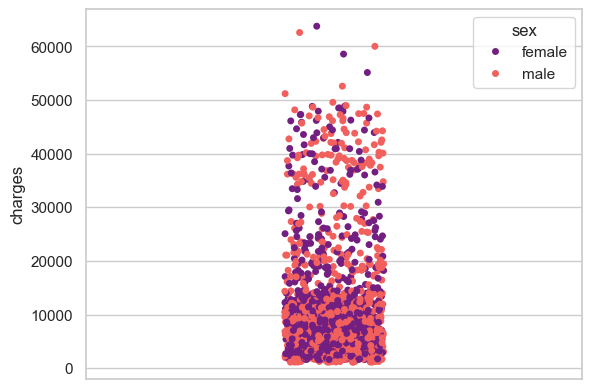

In [217]:
sns.stripplot(y="charges", data=df,hue="sex", jitter=True,palette="magma")
# Plots individual charges as dots on the y-axis; jitter=True spreads overlapping points.
plt.show()


# Box Plot

In [222]:
df = pd.read_csv(r"C:\Users\User\Downloads\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


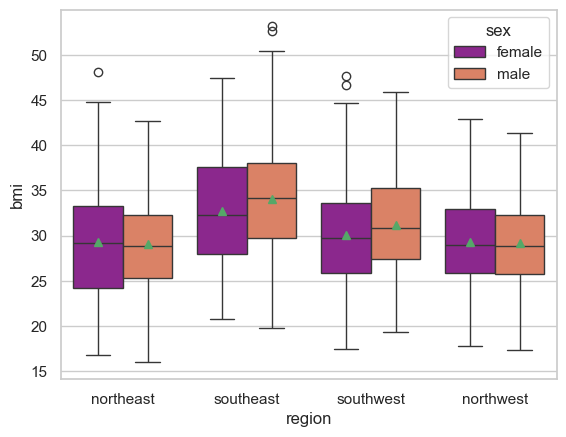

In [246]:
sns.set(style="whitegrid") 
sns.boxplot(x="region",y="bmi",hue="sex",palette="plasma",data=df,order=['northeast','southeast','southwest','northwest'],showmeans=True)
plt.show()

# Cat plot

In [251]:
df = pd.read_csv(r"C:\Users\User\Downloads\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


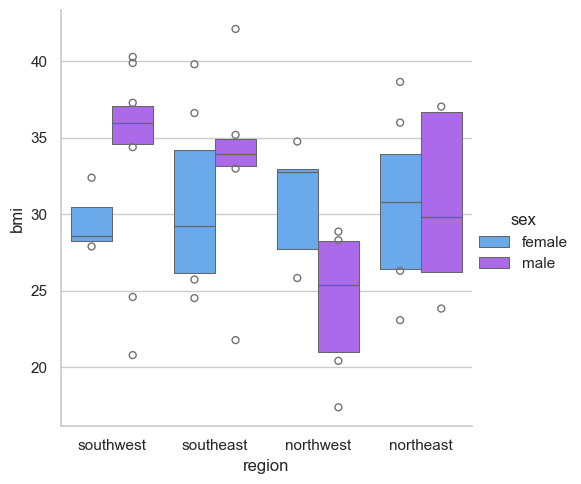

In [266]:
sns.catplot(x="region",y="bmi",hue="sex",data=df.head(50),kind="boxen",palette="cool")
plt.show()

# Multiple Plot (Facet-Grid)

In [269]:
df = pd.read_csv(r"C:\Users\User\Downloads\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


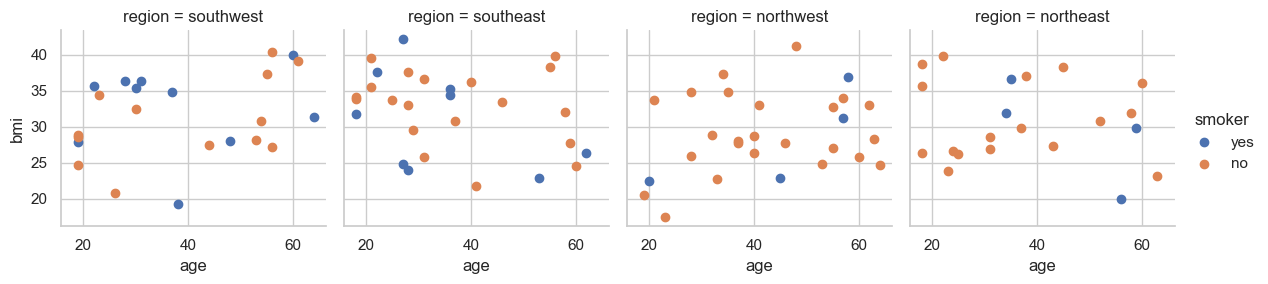

In [281]:
sns.FacetGrid(df.head(100),col="region",hue="smoker").map(plt.scatter,"age","bmi").add_legend()
# add_legend is a must
# col is used to make multi plot
# To change graph type just do plt.scatter
plt.show()